## Final Project

In [13]:
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

creditcard.csv
eegeyestate.csv
voice.csv



In [14]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix#For confusion matrixes
from sklearn import metrics
#from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Classifier Libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

### Load the datasets

In [15]:
#Load datasets
df1 = pd.read_csv('input/voice.csv')
df2 = pd.read_csv('input/creditcard.csv')
df3 = pd.read_csv('input/eegeyestate.csv')

### Preprocessing

In [16]:
#For Voice Dataset
X1=df1.iloc[:, :-1]
y1=df1.iloc[:,-1]
# Encode label category
# male -> 1
# female -> 0
gender_encoder = LabelEncoder()
y1 = gender_encoder.fit_transform(y1)
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)
# Train Test Split trial 1
X1_train1_1, X1_test1_1, y1_train1_1, y1_test1_1 = train_test_split(X1, y1, test_size=0.8, random_state=1)#20/80
X1_train2_1, X1_test2_1, y1_train2_1, y1_test2_1 = train_test_split(X1, y1, test_size=0.5, random_state=1)#50/50
X1_train3_1, X1_test3_1, y1_train3_1, y1_test3_1 = train_test_split(X1, y1, test_size=0.2, random_state=1)#80/20
# Train Test Split trial 2
X1_train1_2, X1_test1_2, y1_train1_2, y1_test1_2 = train_test_split(X1, y1, test_size=0.8, random_state=2)#20/80
X1_train2_2, X1_test2_2, y1_train2_2, y1_test2_2 = train_test_split(X1, y1, test_size=0.5, random_state=2)#50/50
X1_train3_2, X1_test3_2, y1_train3_2, y1_test3_2 = train_test_split(X1, y1, test_size=0.2, random_state=2)#80/20
# Train Test Split trial 3
X1_train1_3, X1_test1_3, y1_train1_3, y1_test1_3 = train_test_split(X1, y1, test_size=0.8, random_state=3)#20/80
X1_train2_3, X1_test2_3, y1_train2_3, y1_test2_3 = train_test_split(X1, y1, test_size=0.5, random_state=3)#50/50
X1_train3_3, X1_test3_3, y1_train3_3, y1_test3_3 = train_test_split(X1, y1, test_size=0.2, random_state=3)#80/20

#For Eye State Dataset
X3=df3.iloc[:, :-1]
y3=df3.iloc[:,-1]
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X3)
X3 = scaler.transform(X3)
# Train Test Split trial 1
X3_train1_1, X3_test1_1, y3_train1_1, y3_test1_1 = train_test_split(X3, y3, test_size=0.8, random_state=1)#20/80
X3_train2_1, X3_test2_1, y3_train2_1, y3_test2_1 = train_test_split(X3, y3, test_size=0.5, random_state=1)#50/50
X3_train3_1, X3_test3_1, y3_train3_1, y3_test3_1 = train_test_split(X3, y3, test_size=0.2, random_state=1)#80/20
# Train Test Split trial 2
X3_train1_2, X3_test1_2, y3_train1_2, y3_test1_2 = train_test_split(X3, y3, test_size=0.8, random_state=2)#20/80
X3_train2_2, X3_test2_2, y3_train2_2, y3_test2_2 = train_test_split(X3, y3, test_size=0.5, random_state=2)#50/50
X3_train3_2, X3_test3_2, y3_train3_2, y3_test3_2 = train_test_split(X3, y3, test_size=0.2, random_state=2)#80/20
# Train Test Split trial 3
X3_train1_3, X3_test1_3, y3_train1_3, y3_test1_3 = train_test_split(X3, y3, test_size=0.8, random_state=3)#20/80
X3_train2_3, X3_test2_3, y3_train2_3, y3_test2_3 = train_test_split(X3, y3, test_size=0.5, random_state=3)#50/50
X3_train3_3, X3_test3_3, y3_train3_3, y3_test3_3 = train_test_split(X3, y3, test_size=0.2, random_state=3)#80/20

#Special Treatment for Dataset 2(Bank Fraud Detection) for large Variance


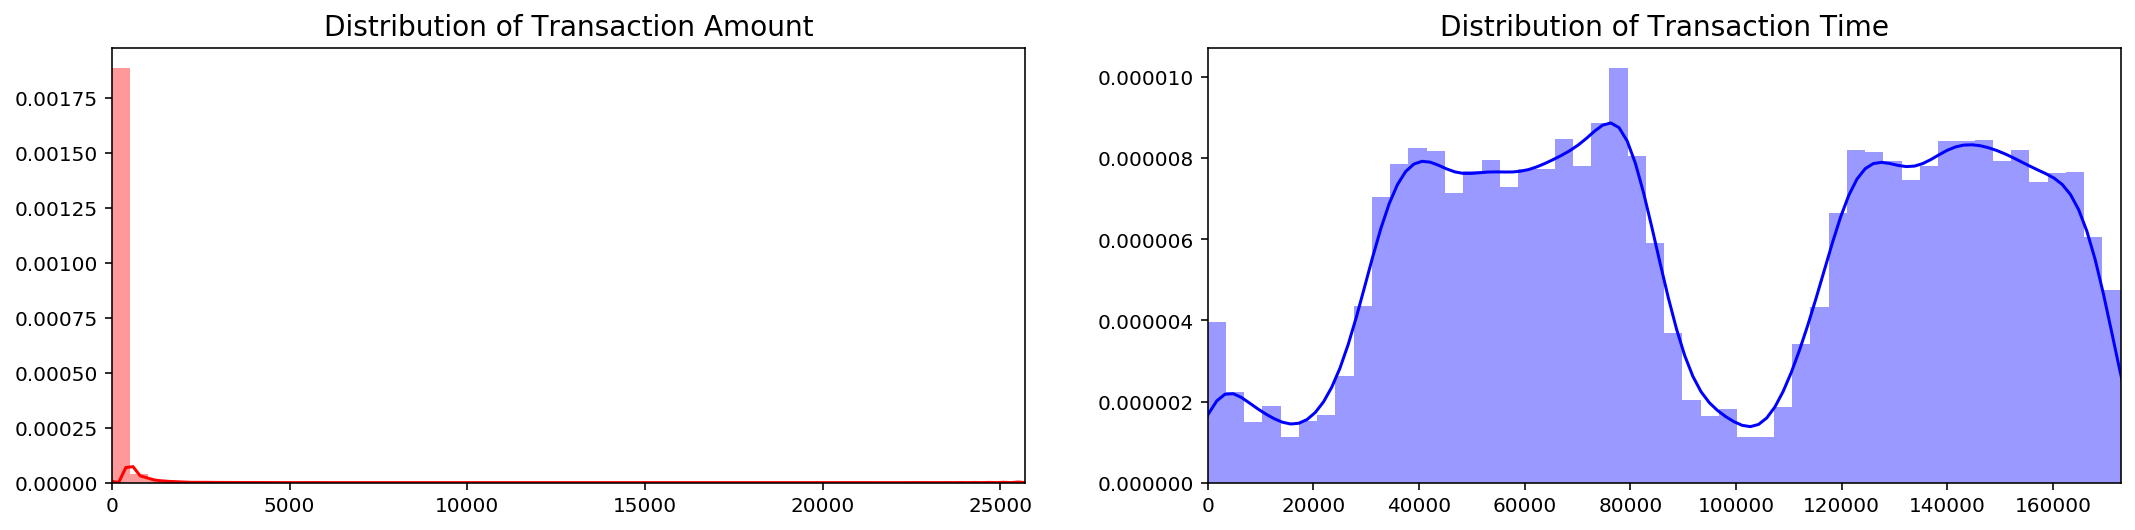

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df2['Amount'].values
time_val = df2['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [18]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df2['scaled_amount'] = rob_scaler.fit_transform(df2['Amount'].values.reshape(-1,1))
df2['scaled_time'] = rob_scaler.fit_transform(df2['Time'].values.reshape(-1,1))

df2.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df2['scaled_amount']
scaled_time = df2['scaled_time']

df2.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df2.insert(0, 'scaled_amount', scaled_amount)
df2.insert(1, 'scaled_time', scaled_time)

X2 = df2.drop('Class', axis=1)
y2 = df2['Class']

# Train Test Split trial 1
X2_train1_1, X2_test1_1, y2_train1_1, y2_test1_1 = train_test_split(X2, y2, test_size=0.8, random_state=1)#20/80
X2_train2_1, X2_test2_1, y2_train2_1, y2_test2_1 = train_test_split(X2, y2, test_size=0.5, random_state=1)#50/50
X2_train3_1, X2_test3_1, y2_train3_1, y2_test3_1 = train_test_split(X2, y2, test_size=0.2, random_state=1)#80/20
# Train Test Split trial 2
X2_train1_2, X2_test1_2, y2_train1_2, y2_test1_2 = train_test_split(X2, y2, test_size=0.8, random_state=2)#20/80
X2_train2_2, X2_test2_2, y2_train2_2, y2_test2_2 = train_test_split(X2, y2, test_size=0.5, random_state=2)#50/50
X2_train3_2, X2_test3_2, y2_train3_2, y2_test3_2 = train_test_split(X2, y2, test_size=0.2, random_state=2)#80/20
# Train Test Split trial 3
X2_train1_3, X2_test1_3, y2_train1_3, y2_test1_3 = train_test_split(X2, y2, test_size=0.8, random_state=3)#20/80
X2_train2_3, X2_test2_3, y2_train2_3, y2_test2_3 = train_test_split(X2, y2, test_size=0.5, random_state=3)#50/50
X2_train3_3, X2_test3_3, y2_train3_3, y2_test3_3 = train_test_split(X2, y2, test_size=0.2, random_state=3)#80/20

### Machine Learning Trial 1

In [34]:
svc=SVC(kernel='rbf')
svc.fit(X1_train1_1,y1_train1_1)
y1_pred1_1_svc_=svc.predict(X1_train1_1)
print('Voice Dataset Trial 1 SVC 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train1_1,y1_pred1_1_svc_))
y1_pred1_1_svc=svc.predict(X1_test1_1)
print('Voice Dataset Trial 1 SVC 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test1_1,y1_pred1_1_svc))

svc.fit(X1_train2_1,y1_train2_1)
y1_pred2_1_svc_=svc.predict(X1_train2_1)
print('Voice Dataset Trial 1 SVC 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train2_1,y1_pred2_1_svc_))
y1_pred2_1_svc=svc.predict(X1_test2_1)
print('Voice Dataset Trial 1 SVC 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test2_1,y1_pred2_1_svc))

svc.fit(X1_train3_1,y1_train3_1)
y1_pred3_1_svc_=svc.predict(X1_train3_1)
print('Voice Dataset Trial 1 SVC 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train3_1,y1_pred3_1_svc_))
y1_pred3_1_svc=svc.predict(X1_test3_1)
print('Voice Dataset Trial 1 SVC 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test3_1,y1_pred3_1_svc))

svc.fit(X2_train1_1,y2_train1_1)
y2_pred1_1_svc_=svc.predict(X2_train1_1)
print('Fraud Dataset Trial 1 SVC 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train1_1,y2_pred1_1_svc_))
y2_pred1_1_svc=svc.predict(X2_test1_1)
print('Fraud Dataset Trial 1 SVC 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test1_1,y2_pred1_1_svc))

svc.fit(X2_train2_1,y2_train2_1)
y2_pred2_1_svc_=svc.predict(X2_train2_1)
print('Fraud Dataset Trial 1 SVC 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train2_1,y2_pred2_1_svc_))
y2_pred2_1_svc=svc.predict(X2_test2_1)
print('Fraud Dataset Trial 1 SVC 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test2_1,y2_pred2_1_svc))

svc.fit(X2_train3_1,y2_train3_1)
y2_pred3_1_svc_=svc.predict(X2_train3_1)
print('Fraud Dataset Trial 1 SVC 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train3_1,y2_pred3_1_svc_))
y2_pred3_1_svc=svc.predict(X2_test3_1)
print('Fraud Dataset Trial 1 SVC 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test3_1,y2_pred3_1_svc))

svc.fit(X3_train1_1,y3_train1_1)
y3_pred1_1_svc_=svc.predict(X3_train1_1)
print('Eye State Dataset Trial 1 SVC 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train1_1,y3_pred1_1_svc_))
y3_pred1_1_svc=svc.predict(X3_test1_1)
print('Eye State Dataset Trial 1 SVC 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test1_1,y3_pred1_1_svc))

svc.fit(X3_train2_1,y3_train2_1)
y3_pred2_1_svc_=svc.predict(X3_train2_1)
print('Eye State Dataset Trial 1 SVC 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train2_1,y3_pred2_1_svc_))
y3_pred2_1_svc=svc.predict(X3_test2_1)
print('Eye State Dataset Trial 1 SVC 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test2_1,y3_pred2_1_svc))

svc.fit(X3_train3_1,y3_train3_1)
y3_pred3_1_svc_=svc.predict(X3_train3_1)
print('Eye State Dataset Trial 1 SVC 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train3_1,y3_pred3_1_svc_))
y3_pred3_1_svc=svc.predict(X3_test3_1)
print('Eye State Dataset Trial 1 SVC 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test3_1,y3_pred3_1_svc))


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X1_train1_1,y1_train1_1)
y1_pred1_1_knn_=knn.predict(X1_train1_1)
print('Voice Dataset Trial 1 KNN 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train1_1,y1_pred1_1_knn_))
y1_pred1_1_knn=knn.predict(X1_test1_1)
print('Voice Dataset Trial 1 KNN 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test1_1,y1_pred1_1_knn))

knn.fit(X1_train2_1,y1_train2_1)
y1_pred2_1_knn_=knn.predict(X1_train2_1)
print('Voice Dataset Trial 1 KNN 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train2_1,y1_pred2_1_knn_))
y1_pred2_1_knn=knn.predict(X1_test2_1)
print('Voice Dataset Trial 1 KNN 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test2_1,y1_pred2_1_knn))

knn.fit(X1_train3_1,y1_train3_1)
y1_pred3_1_knn_=knn.predict(X1_train3_1)
print('Voice Dataset Trial 1 KNN 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train3_1,y1_pred3_1_knn_))
y1_pred3_1_knn=knn.predict(X1_test3_1)
print('Voice Dataset Trial 1 KNN 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test3_1,y1_pred3_1_knn))

knn.fit(X2_train1_1,y2_train1_1)
y2_pred1_1_knn_=knn.predict(X2_train1_1)
print('Fraud Dataset Trial 1 KNN 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train1_1,y2_pred1_1_knn_))
y2_pred1_1_knn=knn.predict(X2_test1_1)
print('Fraud Dataset Trial 1 KNN 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test1_1,y2_pred1_1_knn))

knn.fit(X2_train2_1,y2_train2_1)
y2_pred2_1_knn_=knn.predict(X2_train2_1)
print('Fraud Dataset Trial 1 KNN 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train2_1,y2_pred2_1_knn_))
y2_pred2_1_knn=knn.predict(X2_test2_1)
print('Fraud Dataset Trial 1 KNN 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test2_1,y2_pred2_1_knn))

knn.fit(X2_train3_1,y2_train3_1)
y2_pred3_1_knn_=knn.predict(X2_train3_1)
print('Fraud Dataset Trial 1 KNN 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train3_1,y2_pred3_1_knn_))
y2_pred3_1_knn=knn.predict(X2_test3_1)
print('Fraud Dataset Trial 1 KNN 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test3_1,y2_pred3_1_knn))

knn.fit(X3_train1_1,y3_train1_1)
y3_pred1_1_knn_=knn.predict(X3_train1_1)
print('Eye State Dataset Trial 1 KNN 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train1_1,y3_pred1_1_knn_))
y3_pred1_1_knn=knn.predict(X3_test1_1)
print('Eye State Dataset Trial 1 KNN 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test1_1,y3_pred1_1_knn))

knn.fit(X3_train2_1,y3_train2_1)
y3_pred2_1_knn_=knn.predict(X3_train2_1)
print('Eye State Dataset Trial 1 KNN 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train2_1,y3_pred2_1_knn_))
y3_pred2_1_knn=knn.predict(X3_test2_1)
print('Eye State Dataset Trial 1 KNN 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test2_1,y3_pred2_1_knn))

knn.fit(X3_train3_1,y3_train3_1)
y3_pred3_1_knn_=knn.predict(X3_train3_1)
print('Eye State Dataset Trial 1 KNN 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train3_1,y3_pred3_1_knn_))
y3_pred3_1_knn=knn.predict(X3_test3_1)
print('Eye State Dataset Trial 1 KNN 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test3_1,y3_pred3_1_knn))

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X1_train1_1,y1_train1_1)
y1_pred1_1_dec_tree_=dec_tree.predict(X1_train1_1)
print('Voice Dataset Trial 1 DECTREE 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train1_1,y1_pred1_1_dec_tree_))
y1_pred1_1_dec_tree=dec_tree.predict(X1_test1_1)
print('Voice Dataset Trial 1 DECTREE 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test1_1,y1_pred1_1_dec_tree))

dec_tree.fit(X1_train2_1,y1_train2_1)
y1_pred2_1_dec_tree_=dec_tree.predict(X1_train2_1)
print('Voice Dataset Trial 1 DECTREE 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train2_1,y1_pred2_1_dec_tree_))
y1_pred2_1_dec_tree=dec_tree.predict(X1_test2_1)
print('Voice Dataset Trial 1 DECTREE 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test2_1,y1_pred2_1_dec_tree))

dec_tree.fit(X1_train3_1,y1_train3_1)
y1_pred3_1_dec_tree_=dec_tree.predict(X1_train3_1)
print('Voice Dataset Trial 1 DECTREE 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train3_1,y1_pred3_1_dec_tree_))
y1_pred3_1_dec_tree=dec_tree.predict(X1_test3_1)
print('Voice Dataset Trial 1 DECTREE 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test3_1,y1_pred3_1_dec_tree))

dec_tree.fit(X2_train1_1,y2_train1_1)
y2_pred1_1_dec_tree_=dec_tree.predict(X2_train1_1)
print('Fraud Dataset Trial 1 DECTREE 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train1_1,y2_pred1_1_dec_tree_))
y2_pred1_1_dec_tree=dec_tree.predict(X2_test1_1)
print('Fraud Dataset Trial 1 DECTREE 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test1_1,y2_pred1_1_dec_tree))

dec_tree.fit(X2_train2_1,y2_train2_1)
y2_pred2_1_dec_tree_=dec_tree.predict(X2_train2_1)
print('Fraud Dataset Trial 1 DECTREE 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train2_1,y2_pred2_1_dec_tree_))
y2_pred2_1_dec_tree=dec_tree.predict(X2_test2_1)
print('Fraud Dataset Trial 1 DECTREE 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test2_1,y2_pred2_1_dec_tree))

dec_tree.fit(X2_train3_1,y2_train3_1)
y2_pred3_1_dec_tree_=dec_tree.predict(X2_train3_1)
print('Fraud Dataset Trial 1 DECTREE 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train3_1,y2_pred3_1_dec_tree_))
y2_pred3_1_dec_tree=dec_tree.predict(X2_test3_1)
print('Fraud Dataset Trial 1 DECTREE 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test3_1,y2_pred3_1_dec_tree))

dec_tree.fit(X3_train1_1,y3_train1_1)
y3_pred1_1_dec_tree_=dec_tree.predict(X3_train1_1)
print('Eye State Dataset Trial 1 DECTREE 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train1_1,y3_pred1_1_dec_tree_))
y3_pred1_1_dec_tree=dec_tree.predict(X3_test1_1)
print('Eye State Dataset Trial 1 DECTREE 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test1_1,y3_pred1_1_dec_tree))

dec_tree.fit(X3_train2_1,y3_train2_1)
y3_pred2_1_dec_tree_=dec_tree.predict(X3_train2_1)
print('Eye State Dataset Trial 1 DECTREE 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train2_1,y3_pred2_1_dec_tree_))
y3_pred2_1_dec_tree=dec_tree.predict(X3_test2_1)
print('Eye State Dataset Trial 1 DECTREE 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test2_1,y3_pred2_1_dec_tree))

dec_tree.fit(X3_train3_1,y3_train3_1)
y3_pred3_1_dec_tree_=dec_tree.predict(X3_train3_1)
print('Eye State Dataset Trial 1 DECTREE 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train3_1,y3_pred3_1_dec_tree_))
y3_pred3_1_dec_tree=dec_tree.predict(X3_test3_1)
print('Eye State Dataset Trial 1 DECTREE 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test3_1,y3_pred3_1_dec_tree))

Voice Dataset Trial 1 SVC 20/80 Training Accuracy Score:
0.9889415481832543
Voice Dataset Trial 1 SVC 20/80 Testing Accuracy Score:
0.9719921104536489
Voice Dataset Trial 1 SVC 50/50 Training Accuracy Score:
0.9848484848484849
Voice Dataset Trial 1 SVC 50/50 Testing Accuracy Score:
0.9779040404040404
Voice Dataset Trial 1 SVC 80/20 Training Accuracy Score:
0.9865824782951855
Voice Dataset Trial 1 SVC 80/20 Testing Accuracy Score:
0.9763406940063092
Fraud Dataset Trial 1 SVC 20/80 Training Accuracy Score:
0.9995786590825302
Fraud Dataset Trial 1 SVC 20/80 Testing Accuracy Score:
0.9990476023278881
Fraud Dataset Trial 1 SVC 50/50 Training Accuracy Score:
0.9995927052098621
Fraud Dataset Trial 1 SVC 50/50 Testing Accuracy Score:
0.9993750175556866
Fraud Dataset Trial 1 SVC 80/20 Training Accuracy Score:
0.9996313283153021
Fraud Dataset Trial 1 SVC 80/20 Testing Accuracy Score:
0.9994557775359011
Eye State Dataset Trial 1 SVC 20/80 Training Accuracy Score:
0.7029372496662216
Eye State Data

### Machine Learning Trial 2

In [35]:
svc=SVC(kernel='rbf')
svc.fit(X1_train1_2,y1_train1_2)
y1_pred1_2_svc_=svc.predict(X1_train1_2)
print('Voice Dataset Trial 2 SVC 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train1_2,y1_pred1_2_svc_))
y1_pred1_2_svc=svc.predict(X1_test1_2)
print('Voice Dataset Trial 2 SVC 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test1_2,y1_pred1_2_svc))

svc.fit(X1_train2_2,y1_train2_2)
y1_pred2_2_svc_=svc.predict(X1_train2_2)
print('Voice Dataset Trial 2 SVC 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train2_2,y1_pred2_2_svc_))
y1_pred2_2_svc=svc.predict(X1_test2_2)
print('Voice Dataset Trial 2 SVC 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test2_2,y1_pred2_2_svc))

svc.fit(X1_train3_2,y1_train3_2)
y1_pred3_2_svc_=svc.predict(X1_train3_2)
print('Voice Dataset Trial 2 SVC 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train3_2,y1_pred3_2_svc_))
y1_pred3_2_svc=svc.predict(X1_test3_2)
print('Voice Dataset Trial 2 SVC 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test3_2,y1_pred3_2_svc))

svc.fit(X2_train1_2,y2_train1_2)
y2_pred1_2_svc_=svc.predict(X2_train1_2)
print('Fraud Dataset Trial 2 SVC 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train1_2,y2_pred1_2_svc_))
y2_pred1_2_svc=svc.predict(X2_test1_2)
print('Fraud Dataset Trial 2 SVC 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test1_2,y2_pred1_2_svc))

svc.fit(X2_train2_2,y2_train2_2)
y2_pred2_2_svc_=svc.predict(X2_train2_2)
print('Fraud Dataset Trial 2 SVC 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train2_2,y2_pred2_2_svc_))
y2_pred2_2_svc=svc.predict(X2_test2_2)
print('Fraud Dataset Trial 2 SVC 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test2_2,y2_pred2_2_svc))

svc.fit(X2_train3_2,y2_train3_2)
y2_pred3_2_svc_=svc.predict(X2_train3_2)
print('Fraud Dataset Trial 2 SVC 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train3_2,y2_pred3_2_svc_))
y2_pred3_2_svc=svc.predict(X2_test3_2)
print('Fraud Dataset Trial 2 SVC 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test3_2,y2_pred3_2_svc))

svc.fit(X3_train1_2,y3_train1_2)
y3_pred1_2_svc_=svc.predict(X3_train1_2)
print('Eye State Dataset Trial 2 SVC 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train1_2,y3_pred1_2_svc_))
y3_pred1_2_svc=svc.predict(X3_test1_2)
print('Eye State Dataset Trial 2 SVC 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test1_2,y3_pred1_2_svc))

svc.fit(X3_train2_2,y3_train2_2)
y3_pred2_2_svc_=svc.predict(X3_train2_2)
print('Eye State Dataset Trial 2 SVC 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train2_2,y3_pred2_2_svc_))
y3_pred2_2_svc=svc.predict(X3_test2_2)
print('Eye State Dataset Trial 2 SVC 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test2_2,y3_pred2_2_svc))

svc.fit(X3_train3_2,y3_train3_2)
y3_pred3_2_svc_=svc.predict(X3_train3_2)
print('Eye State Dataset Trial 2 SVC 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train3_2,y3_pred3_2_svc_))
y3_pred3_2_svc=svc.predict(X3_test3_2)
print('Eye State Dataset Trial 2 SVC 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test3_2,y3_pred3_2_svc))


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X1_train1_2,y1_train1_2)
y1_pred1_2_knn_=knn.predict(X1_train1_2)
print('Voice Dataset Trial 2 KNN 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train1_2,y1_pred1_2_knn_))
y1_pred1_2_knn=knn.predict(X1_test1_2)
print('Voice Dataset Trial 2 KNN 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test1_2,y1_pred1_2_knn))

knn.fit(X1_train2_2,y1_train2_2)
y1_pred2_2_knn_=knn.predict(X1_train2_2)
print('Voice Dataset Trial 2 KNN 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train2_2,y1_pred2_2_knn_))
y1_pred2_2_knn=knn.predict(X1_test2_2)
print('Voice Dataset Trial 2 KNN 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test2_2,y1_pred2_2_knn))

knn.fit(X1_train3_2,y1_train3_2)
y1_pred3_2_knn_=knn.predict(X1_train3_2)
print('Voice Dataset Trial 2 KNN 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train3_2,y1_pred3_2_knn_))
y1_pred3_2_knn=knn.predict(X1_test3_2)
print('Voice Dataset Trial 2 KNN 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test3_2,y1_pred3_2_knn))

knn.fit(X2_train1_2,y2_train1_2)
y2_pred1_2_knn_=knn.predict(X2_train1_2)
print('Fraud Dataset Trial 2 KNN 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train1_2,y2_pred1_2_knn_))
y2_pred1_2_knn=knn.predict(X2_test1_2)
print('Fraud Dataset Trial 2 KNN 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test1_2,y2_pred1_2_knn))

knn.fit(X2_train2_2,y2_train2_2)
y2_pred2_2_knn_=knn.predict(X2_train2_2)
print('Fraud Dataset Trial 2 KNN 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train2_2,y2_pred2_2_knn_))
y2_pred2_2_knn=knn.predict(X2_test2_2)
print('Fraud Dataset Trial 2 KNN 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test2_2,y2_pred2_2_knn))

knn.fit(X2_train3_2,y2_train3_2)
y2_pred3_2_knn_=knn.predict(X2_train3_2)
print('Fraud Dataset Trial 2 KNN 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train3_2,y2_pred3_2_knn_))
y2_pred3_2_knn=knn.predict(X2_test3_2)
print('Fraud Dataset Trial 2 KNN 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test3_2,y2_pred3_2_knn))

knn.fit(X3_train1_2,y3_train1_2)
y3_pred1_2_knn_=knn.predict(X3_train1_2)
print('Eye State Dataset Trial 2 KNN 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train1_2,y3_pred1_2_knn_))
y3_pred1_2_knn=knn.predict(X3_test1_2)
print('Eye State Dataset Trial 2 KNN 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test1_2,y3_pred1_2_knn))

knn.fit(X3_train2_2,y3_train2_2)
y3_pred2_2_knn_=knn.predict(X3_train2_2)
print('Eye State Dataset Trial 2 KNN 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train2_2,y3_pred2_2_knn_))
y3_pred2_2_knn=knn.predict(X3_test2_2)
print('Eye State Dataset Trial 2 KNN 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test2_2,y3_pred2_2_knn))

knn.fit(X3_train3_2,y3_train3_2)
y3_pred3_2_knn_=knn.predict(X3_train3_2)
print('Eye State Dataset Trial 2 KNN 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train3_2,y3_pred3_2_knn_))
y3_pred3_2_knn=knn.predict(X3_test3_2)
print('Eye State Dataset Trial 2 KNN 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test3_2,y3_pred3_2_knn))


dec_tree = DecisionTreeClassifier()
dec_tree.fit(X1_train1_2,y1_train1_2)
y1_pred1_2_dec_tree_=dec_tree.predict(X1_train1_2)
print('Voice Dataset Trial 2 DECTREE 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train1_2,y1_pred1_2_dec_tree_))
y1_pred1_2_dec_tree=dec_tree.predict(X1_test1_2)
print('Voice Dataset Trial 2 DECTREE 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test1_2,y1_pred1_2_dec_tree))

dec_tree.fit(X1_train2_2,y1_train2_2)
y1_pred2_2_dec_tree_=dec_tree.predict(X1_train2_2)
print('Voice Dataset Trial 2 DECTREE 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train2_2,y1_pred2_2_dec_tree_))
y1_pred2_2_dec_tree=dec_tree.predict(X1_test2_2)
print('Voice Dataset Trial 2 DECTREE 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test2_2,y1_pred2_2_dec_tree))

dec_tree.fit(X1_train3_2,y1_train3_2)
y1_pred3_2_dec_tree_=dec_tree.predict(X1_train3_2)
print('Voice Dataset Trial 2 DECTREE 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train3_2,y1_pred3_2_dec_tree_))
y1_pred3_2_dec_tree=dec_tree.predict(X1_test3_2)
print('Voice Dataset Trial 2 DECTREE 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test3_2,y1_pred3_2_dec_tree))

dec_tree.fit(X2_train1_2,y2_train1_2)
y2_pred1_2_dec_tree_=dec_tree.predict(X2_train1_2)
print('Fraud Dataset Trial 2 DECTREE 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train1_2,y2_pred1_2_dec_tree_))
y2_pred1_2_dec_tree=dec_tree.predict(X2_test1_2)
print('Fraud Dataset Trial 2 DECTREE 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test1_2,y2_pred1_2_dec_tree))

dec_tree.fit(X2_train2_2,y2_train2_2)
y2_pred2_2_dec_tree_=dec_tree.predict(X2_train2_2)
print('Fraud Dataset Trial 2 DECTREE 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train2_2,y2_pred2_2_dec_tree_))
y2_pred2_2_dec_tree=dec_tree.predict(X2_test2_2)
print('Fraud Dataset Trial 2 DECTREE 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test2_2,y2_pred2_2_dec_tree))

dec_tree.fit(X2_train3_2,y2_train3_2)
y2_pred3_2_dec_tree_=dec_tree.predict(X2_train3_2)
print('Fraud Dataset Trial 2 DECTREE 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train3_2,y2_pred3_2_dec_tree_))
y2_pred3_2_dec_tree=dec_tree.predict(X2_test3_2)
print('Fraud Dataset Trial 2 DECTREE 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test3_2,y2_pred3_2_dec_tree))

dec_tree.fit(X3_train1_2,y3_train1_2)
y3_pred1_2_dec_tree_=dec_tree.predict(X3_train1_2)
print('Eye State Dataset Trial 2 DECTREE 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train1_2,y3_pred1_2_dec_tree_))
y3_pred1_2_dec_tree=dec_tree.predict(X3_test1_2)
print('Eye State Dataset Trial 2 DECTREE 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test1_2,y3_pred1_2_dec_tree))

dec_tree.fit(X3_train2_2,y3_train2_2)
y3_pred2_2_dec_tree_=dec_tree.predict(X3_train2_2)
print('Eye State Dataset Trial 2 DECTREE 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train2_2,y3_pred2_2_dec_tree_))
y3_pred2_2_dec_tree=dec_tree.predict(X3_test2_2)
print('Eye State Dataset Trial 2 DECTREE 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test2_2,y3_pred2_2_dec_tree))

dec_tree.fit(X3_train3_2,y3_train3_2)
y3_pred3_2_dec_tree_=dec_tree.predict(X3_train3_2)
print('Eye State Dataset Trial 2 DECTREE 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train3_2,y3_pred3_2_dec_tree_))
y3_pred3_2_dec_tree=dec_tree.predict(X3_test3_2)
print('Eye State Dataset Trial 2 DECTREE 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test3_2,y3_pred3_2_dec_tree))

Voice Dataset Trial 2 SVC 20/80 Training Accuracy Score:
0.9842022116903634
Voice Dataset Trial 2 SVC 20/80 Testing Accuracy Score:
0.967258382642998
Voice Dataset Trial 2 SVC 50/50 Training Accuracy Score:
0.9886363636363636
Voice Dataset Trial 2 SVC 50/50 Testing Accuracy Score:
0.9766414141414141
Voice Dataset Trial 2 SVC 80/20 Training Accuracy Score:
0.9861878453038674
Voice Dataset Trial 2 SVC 80/20 Testing Accuracy Score:
0.9747634069400631
Fraud Dataset Trial 2 SVC 20/80 Training Accuracy Score:
0.9997015501834589
Fraud Dataset Trial 2 SVC 20/80 Testing Accuracy Score:
0.9989686015993259
Fraud Dataset Trial 2 SVC 50/50 Training Accuracy Score:
0.9996348391536695
Fraud Dataset Trial 2 SVC 50/50 Testing Accuracy Score:
0.9992767057105137
Fraud Dataset Trial 2 SVC 80/20 Training Accuracy Score:
0.9995874388290285
Fraud Dataset Trial 2 SVC 80/20 Testing Accuracy Score:
0.9996313331694814
Eye State Dataset Trial 2 SVC 20/80 Training Accuracy Score:
0.5917890520694259
Eye State Datas

### Machine Learning Trial 3

In [36]:
svc=SVC(kernel='rbf')
svc.fit(X1_train1_3,y1_train1_3)
y1_pred1_3_svc_=svc.predict(X1_train1_3)
print('Voice Dataset Trial 3 SVC 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train1_3,y1_pred1_3_svc_))
y1_pred1_3_svc=svc.predict(X1_test1_3)
print('Voice Dataset Trial 3 SVC 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test1_3,y1_pred1_3_svc))

svc.fit(X1_train2_3,y1_train2_3)
y1_pred2_3_svc_=svc.predict(X1_train2_3)
print('Voice Dataset Trial 3 SVC 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train2_3,y1_pred2_3_svc_))
y1_pred2_3_svc=svc.predict(X1_test2_3)
print('Voice Dataset Trial 3 SVC 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test2_3,y1_pred2_3_svc))

svc.fit(X1_train3_3,y1_train3_3)
y1_pred3_3_svc_=svc.predict(X1_train3_3)
print('Voice Dataset Trial 3 SVC 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train3_3,y1_pred3_3_svc_))
y1_pred3_3_svc=svc.predict(X1_test3_3)
print('Voice Dataset Trial 3 SVC 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test3_3,y1_pred3_3_svc))

svc.fit(X2_train1_3,y2_train1_3)
y2_pred1_3_svc_=svc.predict(X2_train1_3)
print('Fraud Dataset Trial 3 SVC 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train1_3,y2_pred1_3_svc_))
y2_pred1_3_svc=svc.predict(X2_test1_3)
print('Fraud Dataset Trial 3 SVC 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test1_3,y2_pred1_3_svc))

svc.fit(X2_train2_3,y2_train2_3)
y2_pred2_3_svc_=svc.predict(X2_train2_3)
print('Fraud Dataset Trial 3 SVC 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train2_3,y2_pred2_3_svc_))
y2_pred2_3_svc=svc.predict(X2_test2_3)
print('Fraud Dataset Trial 3 SVC 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test2_3,y2_pred2_3_svc))

svc.fit(X2_train3_3,y2_train3_3)
y2_pred3_3_svc_=svc.predict(X2_train3_3)
print('Fraud Dataset Trial 3 SVC 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train3_3,y2_pred3_3_svc_))
y2_pred3_3_svc=svc.predict(X2_test3_3)
print('Fraud Dataset Trial 3 SVC 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test3_3,y2_pred3_3_svc))

svc.fit(X3_train1_3,y3_train1_3)
y3_pred1_3_svc_=svc.predict(X3_train1_3)
print('Eye State Dataset Trial 3 SVC 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train1_3,y3_pred1_3_svc_))
y3_pred1_3_svc=svc.predict(X3_test1_3)
print('Eye State Dataset Trial 3 SVC 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test1_3,y3_pred1_3_svc))

svc.fit(X3_train2_3,y3_train2_3)
y3_pred2_3_svc_=svc.predict(X3_train2_3)
print('Eye State Dataset Trial 3 SVC 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train2_3,y3_pred2_3_svc_))
y3_pred2_3_svc=svc.predict(X3_test2_3)
print('Eye State Dataset Trial 3 SVC 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test2_3,y3_pred2_3_svc))

svc.fit(X3_train3_3,y3_train3_3)
y3_pred3_3_svc_=svc.predict(X3_train3_3)
print('Eye State Dataset Trial 3 SVC 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train3_3,y3_pred3_3_svc_))
y3_pred3_3_svc=svc.predict(X3_test3_3)
print('Eye State Dataset Trial 3 SVC 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test3_3,y3_pred3_3_svc))


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X1_train1_3,y1_train1_3)
y1_pred1_3_knn_=knn.predict(X1_train1_3)
print('Voice Dataset Trial 3 KNN 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train1_3,y1_pred1_3_knn_))
y1_pred1_3_knn=knn.predict(X1_test1_3)
print('Voice Dataset Trial 3 KNN 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test1_3,y1_pred1_3_knn))

knn.fit(X1_train2_3,y1_train2_3)
y1_pred2_3_knn_=knn.predict(X1_train2_3)
print('Voice Dataset Trial 3 KNN 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train2_3,y1_pred2_3_knn_))
y1_pred2_3_knn=knn.predict(X1_test2_3)
print('Voice Dataset Trial 3 KNN 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test2_3,y1_pred2_3_knn))

knn.fit(X1_train3_3,y1_train3_3)
y1_pred3_3_knn_=knn.predict(X1_train3_3)
print('Voice Dataset Trial 3 KNN 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train3_3,y1_pred3_3_knn_))
y1_pred3_3_knn=knn.predict(X1_test3_3)
print('Voice Dataset Trial 3 KNN 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test3_3,y1_pred3_3_knn))

knn.fit(X2_train1_3,y2_train1_3)
y2_pred1_3_knn_=knn.predict(X2_train1_3)
print('Fraud Dataset Trial 3 KNN 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train1_3,y2_pred1_3_knn_))
y2_pred1_3_knn=knn.predict(X2_test1_3)
print('Fraud Dataset Trial 3 KNN 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test1_3,y2_pred1_3_knn))

knn.fit(X2_train2_3,y2_train2_3)
y2_pred2_3_knn_=knn.predict(X2_train2_3)
print('Fraud Dataset Trial 3 KNN 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train2_3,y2_pred2_3_knn_))
y2_pred2_3_knn=knn.predict(X2_test2_3)
print('Fraud Dataset Trial 3 KNN 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test2_3,y2_pred2_3_knn))

knn.fit(X2_train3_3,y2_train3_3)
y2_pred3_3_knn_=knn.predict(X2_train3_3)
print('Fraud Dataset Trial 3 KNN 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train3_3,y2_pred3_3_knn_))
y2_pred3_3_knn=knn.predict(X2_test3_3)
print('Fraud Dataset Trial 3 KNN 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test3_3,y2_pred3_3_knn))

knn.fit(X3_train1_3,y3_train1_3)
y3_pred1_3_knn_=knn.predict(X3_train1_3)
print('Eye State Dataset Trial 3 KNN 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train1_3,y3_pred1_3_knn_))
y3_pred1_3_knn=knn.predict(X3_test1_3)
print('Eye State Dataset Trial 3 KNN 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test1_3,y3_pred1_3_knn))

knn.fit(X3_train2_3,y3_train2_3)
y3_pred2_3_knn_=knn.predict(X3_train2_3)
print('Eye State Dataset Trial 3 KNN 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train2_3,y3_pred2_3_knn_))
y3_pred2_3_knn=knn.predict(X3_test2_3)
print('Eye State Dataset Trial 3 KNN 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test2_3,y3_pred2_3_knn))

knn.fit(X3_train3_3,y3_train3_3)
y3_pred3_3_knn_=knn.predict(X3_train3_3)
print('Eye State Dataset Trial 3 KNN 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train3_3,y3_pred3_3_knn_))
y3_pred3_3_knn=knn.predict(X3_test3_3)
print('Eye State Dataset Trial 3 KNN 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test3_3,y3_pred3_3_knn))


dec_tree = DecisionTreeClassifier()
dec_tree.fit(X1_train1_3,y1_train1_3)
y1_pred1_3_dec_tree_=dec_tree.predict(X1_train1_3)
print('Voice Dataset Trial 3 DECTREE 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train1_3,y1_pred1_3_dec_tree_))
y1_pred1_3_dec_tree=dec_tree.predict(X1_test1_3)
print('Voice Dataset Trial 3 DECTREE 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test1_3,y1_pred1_3_dec_tree))

dec_tree.fit(X1_train2_3,y1_train2_3)
y1_pred2_3_dec_tree_=dec_tree.predict(X1_train2_3)
print('Voice Dataset Trial 3 DECTREE 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train2_3,y1_pred2_3_dec_tree_))
y1_pred2_3_dec_tree=dec_tree.predict(X1_test2_3)
print('Voice Dataset Trial 3 DECTREE 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test2_3,y1_pred2_3_dec_tree))

dec_tree.fit(X1_train3_3,y1_train3_3)
y1_pred3_3_dec_tree_=dec_tree.predict(X1_train3_3)
print('Voice Dataset Trial 3 DECTREE 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y1_train3_3,y1_pred3_3_dec_tree_))
y1_pred3_3_dec_tree=dec_tree.predict(X1_test3_3)
print('Voice Dataset Trial 3 DECTREE 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y1_test3_3,y1_pred3_3_dec_tree))

dec_tree.fit(X2_train1_3,y2_train1_3)
y2_pred1_3_dec_tree_=dec_tree.predict(X2_train1_3)
print('Fraud Dataset Trial 3 DECTREE 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train1_3,y2_pred1_3_dec_tree_))
y2_pred1_3_dec_tree=dec_tree.predict(X2_test1_3)
print('Fraud Dataset Trial 3 DECTREE 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test1_3,y2_pred1_3_dec_tree))

dec_tree.fit(X2_train2_3,y2_train2_3)
y2_pred2_3_dec_tree_=dec_tree.predict(X2_train2_3)
print('Fraud Dataset Trial 3 DECTREE 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train2_3,y2_pred2_3_dec_tree_))
y2_pred2_3_dec_tree=dec_tree.predict(X2_test2_3)
print('Fraud Dataset Trial 3 DECTREE 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test2_3,y2_pred2_3_dec_tree))

dec_tree.fit(X2_train3_3,y2_train3_3)
y2_pred3_3_dec_tree_=dec_tree.predict(X2_train3_3)
print('Fraud Dataset Trial 3 DECTREE 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y2_train3_3,y2_pred3_3_dec_tree_))
y2_pred3_3_dec_tree=dec_tree.predict(X2_test3_3)
print('Fraud Dataset Trial 3 DECTREE 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y2_test3_3,y2_pred3_3_dec_tree))

dec_tree.fit(X3_train1_3,y3_train1_3)
y3_pred1_3_dec_tree_=dec_tree.predict(X3_train1_3)
print('Eye State Dataset Trial 3 DECTREE 20/80 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train1_3,y3_pred1_3_dec_tree_))
y3_pred1_3_dec_tree=dec_tree.predict(X3_test1_3)
print('Eye State Dataset Trial 3 DECTREE 20/80 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test1_3,y3_pred1_3_dec_tree))

dec_tree.fit(X3_train2_3,y3_train2_3)
y3_pred2_3_dec_tree_=dec_tree.predict(X3_train2_3)
print('Eye State Dataset Trial 3 DECTREE 50/50 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train2_3,y3_pred2_3_dec_tree_))
y3_pred2_3_dec_tree=dec_tree.predict(X3_test2_3)
print('Eye State Dataset Trial 3 DECTREE 50/50 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test2_3,y3_pred2_3_dec_tree))

dec_tree.fit(X3_train3_3,y3_train3_3)
y3_pred3_3_dec_tree_=dec_tree.predict(X3_train3_3)
print('Eye State Dataset Trial 3 DECTREE 80/20 Training Accuracy Score:')
print(metrics.accuracy_score(y3_train3_3,y3_pred3_3_dec_tree_))
y3_pred3_3_dec_tree=dec_tree.predict(X3_test3_3)
print('Eye State Dataset Trial 3 DECTREE 80/20 Testing Accuracy Score:')
print(metrics.accuracy_score(y3_test3_3,y3_pred3_3_dec_tree))

Voice Dataset Trial 3 SVC 20/80 Training Accuracy Score:
0.985781990521327
Voice Dataset Trial 3 SVC 20/80 Testing Accuracy Score:
0.9751479289940829
Voice Dataset Trial 3 SVC 50/50 Training Accuracy Score:
0.9886363636363636
Voice Dataset Trial 3 SVC 50/50 Testing Accuracy Score:
0.9753787878787878
Voice Dataset Trial 3 SVC 80/20 Training Accuracy Score:
0.9861878453038674
Voice Dataset Trial 3 SVC 80/20 Testing Accuracy Score:
0.9810725552050473
Fraud Dataset Trial 3 SVC 20/80 Training Accuracy Score:
0.9995962149540913
Fraud Dataset Trial 3 SVC 20/80 Testing Accuracy Score:
0.9992407152199293
Fraud Dataset Trial 3 SVC 50/50 Training Accuracy Score:
0.9995856828858942
Fraud Dataset Trial 3 SVC 50/50 Testing Accuracy Score:
0.9994241734782731
Fraud Dataset Trial 3 SVC 80/20 Training Accuracy Score:
0.9996444951611841
Fraud Dataset Trial 3 SVC 80/20 Testing Accuracy Score:
0.9993328885923949
Eye State Dataset Trial 3 SVC 20/80 Training Accuracy Score:
0.7202937249666221
Eye State Datas

In [60]:
y1_28_svc_avg=np.average([metrics.accuracy_score(y1_test1_1,y1_pred1_1_svc),
           metrics.accuracy_score(y1_test1_2,y1_pred1_2_svc),
           metrics.accuracy_score(y1_test1_3,y1_pred1_3_svc)])
y1_28_svc_std=np.std([metrics.accuracy_score(y1_test1_1,y1_pred1_1_svc),
           metrics.accuracy_score(y1_test1_2,y1_pred1_2_svc),
           metrics.accuracy_score(y1_test1_3,y1_pred1_3_svc)])
y2_28_svc_avg=np.average([metrics.accuracy_score(y2_test1_1,y2_pred1_1_svc),
           metrics.accuracy_score(y2_test1_2,y2_pred1_2_svc),
           metrics.accuracy_score(y2_test1_3,y2_pred1_3_svc)])
y2_28_svc_std=np.std([metrics.accuracy_score(y2_test1_1,y2_pred1_1_svc),
           metrics.accuracy_score(y2_test1_2,y2_pred1_2_svc),
           metrics.accuracy_score(y2_test1_3,y2_pred1_3_svc)])
y3_28_svc_avg=np.average([metrics.accuracy_score(y3_test1_1,y3_pred1_1_svc),
           metrics.accuracy_score(y3_test1_2,y3_pred1_2_svc),
           metrics.accuracy_score(y3_test1_3,y3_pred1_3_svc)])
y3_28_svc_std=np.std([metrics.accuracy_score(y3_test1_1,y3_pred1_1_svc),
           metrics.accuracy_score(y3_test1_2,y3_pred1_2_svc),
           metrics.accuracy_score(y3_test1_3,y3_pred1_3_svc)])
svc_avg_28=np.average([y1_28_svc_avg,y2_28_svc_avg,y3_28_svc_avg])


y1_28_knn_avg=np.average([metrics.accuracy_score(y1_test1_1,y1_pred1_1_knn),
           metrics.accuracy_score(y1_test1_2,y1_pred1_2_knn),
           metrics.accuracy_score(y1_test1_3,y1_pred1_3_knn)])
y1_28_knn_std=np.std([metrics.accuracy_score(y1_test1_1,y1_pred1_1_knn),
           metrics.accuracy_score(y1_test1_2,y1_pred1_2_knn),
           metrics.accuracy_score(y1_test1_3,y1_pred1_3_knn)])
y2_28_knn_avg=np.average([metrics.accuracy_score(y2_test1_1,y2_pred1_1_knn),
           metrics.accuracy_score(y2_test1_2,y2_pred1_2_knn),
           metrics.accuracy_score(y2_test1_3,y2_pred1_3_knn)])
y2_28_knn_std=np.std([metrics.accuracy_score(y2_test1_1,y2_pred1_1_knn),
           metrics.accuracy_score(y2_test1_2,y2_pred1_2_knn),
           metrics.accuracy_score(y2_test1_3,y2_pred1_3_knn)])
y3_28_knn_avg=np.average([metrics.accuracy_score(y3_test1_1,y3_pred1_1_knn),
           metrics.accuracy_score(y3_test1_2,y3_pred1_2_knn),
           metrics.accuracy_score(y3_test1_3,y3_pred1_3_knn)])
y3_28_knn_std=np.std([metrics.accuracy_score(y3_test1_1,y3_pred1_1_knn),
           metrics.accuracy_score(y3_test1_2,y3_pred1_2_knn),
           metrics.accuracy_score(y3_test1_3,y3_pred1_3_knn)])
knn_avg_28=np.average([y1_28_knn_avg,y2_28_knn_avg,y3_28_knn_avg])


y1_28_dec_tree_avg=np.average([metrics.accuracy_score(y1_test1_1,y1_pred1_1_dec_tree),
           metrics.accuracy_score(y1_test1_2,y1_pred1_2_dec_tree),
           metrics.accuracy_score(y1_test1_3,y1_pred1_3_dec_tree)])
y1_28_dec_tree_std=np.std([metrics.accuracy_score(y1_test1_1,y1_pred1_1_dec_tree),
           metrics.accuracy_score(y1_test1_2,y1_pred1_2_dec_tree),
           metrics.accuracy_score(y1_test1_3,y1_pred1_3_dec_tree)])
y2_28_dec_tree_avg=np.average([metrics.accuracy_score(y2_test1_1,y2_pred1_1_dec_tree),
           metrics.accuracy_score(y2_test1_2,y2_pred1_2_dec_tree),
           metrics.accuracy_score(y2_test1_3,y2_pred1_3_dec_tree)])
y2_28_dec_tree_std=np.std([metrics.accuracy_score(y2_test1_1,y2_pred1_1_dec_tree),
           metrics.accuracy_score(y2_test1_2,y2_pred1_2_dec_tree),
           metrics.accuracy_score(y2_test1_3,y2_pred1_3_dec_tree)])
y3_28_dec_tree_avg=np.average([metrics.accuracy_score(y3_test1_1,y3_pred1_1_dec_tree),
           metrics.accuracy_score(y3_test1_2,y3_pred1_2_dec_tree),
           metrics.accuracy_score(y3_test1_3,y3_pred1_3_dec_tree)])
y3_28_dec_tree_std=np.std([metrics.accuracy_score(y3_test1_1,y3_pred1_1_dec_tree),
           metrics.accuracy_score(y3_test1_2,y3_pred1_2_dec_tree),
           metrics.accuracy_score(y3_test1_3,y3_pred1_3_dec_tree)])
dec_tree_avg_28=np.average([y1_28_dec_tree_avg,y2_28_dec_tree_avg,y3_28_dec_tree_avg])

####

y1_55_svc_avg=np.average([metrics.accuracy_score(y1_test2_1,y1_pred2_1_svc),
           metrics.accuracy_score(y1_test2_2,y1_pred2_2_svc),
           metrics.accuracy_score(y1_test2_3,y1_pred2_3_svc)])
y1_55_svc_std=np.std([metrics.accuracy_score(y1_test2_1,y1_pred2_1_svc),
           metrics.accuracy_score(y1_test2_2,y1_pred2_2_svc),
           metrics.accuracy_score(y1_test2_3,y1_pred2_3_svc)])
y2_55_svc_avg=np.average([metrics.accuracy_score(y2_test2_1,y2_pred2_1_svc),
           metrics.accuracy_score(y2_test2_2,y2_pred2_2_svc),
           metrics.accuracy_score(y2_test2_3,y2_pred2_3_svc)])
y2_55_svc_std=np.std([metrics.accuracy_score(y2_test2_1,y2_pred2_1_svc),
           metrics.accuracy_score(y2_test2_2,y2_pred2_2_svc),
           metrics.accuracy_score(y2_test2_3,y2_pred2_3_svc)])
y3_55_svc_avg=np.average([metrics.accuracy_score(y3_test2_1,y3_pred2_1_svc),
           metrics.accuracy_score(y3_test2_2,y3_pred2_2_svc),
           metrics.accuracy_score(y3_test2_3,y3_pred2_3_svc)])
y3_55_svc_std=np.std([metrics.accuracy_score(y3_test2_1,y3_pred2_1_svc),
           metrics.accuracy_score(y3_test2_2,y3_pred2_2_svc),
           metrics.accuracy_score(y3_test2_3,y3_pred2_3_svc)])
svc_avg_55=np.average([y1_55_svc_avg,y2_55_svc_avg,y3_55_svc_avg])


y1_55_knn_avg=np.average([metrics.accuracy_score(y1_test2_1,y1_pred2_1_knn),
           metrics.accuracy_score(y1_test2_2,y1_pred2_2_knn),
           metrics.accuracy_score(y1_test2_3,y1_pred2_3_knn)])
y1_55_knn_std=np.std([metrics.accuracy_score(y1_test2_1,y1_pred2_1_knn),
           metrics.accuracy_score(y1_test2_2,y1_pred2_2_knn),
           metrics.accuracy_score(y1_test2_3,y1_pred2_3_knn)])
y2_55_knn_avg=np.average([metrics.accuracy_score(y2_test2_1,y2_pred2_1_knn),
           metrics.accuracy_score(y2_test2_2,y2_pred2_2_knn),
           metrics.accuracy_score(y2_test2_3,y2_pred2_3_knn)])
y2_55_knn_std=np.std([metrics.accuracy_score(y2_test2_1,y2_pred2_1_knn),
           metrics.accuracy_score(y2_test2_2,y2_pred2_2_knn),
           metrics.accuracy_score(y2_test2_3,y2_pred2_3_knn)])
y3_55_knn_avg=np.average([metrics.accuracy_score(y3_test2_1,y3_pred2_1_knn),
           metrics.accuracy_score(y3_test2_2,y3_pred2_2_knn),
           metrics.accuracy_score(y3_test2_3,y3_pred2_3_knn)])
y3_55_knn_std=np.std([metrics.accuracy_score(y3_test2_1,y3_pred2_1_knn),
           metrics.accuracy_score(y3_test2_2,y3_pred2_2_knn),
           metrics.accuracy_score(y3_test2_3,y3_pred2_3_knn)])
knn_avg_55=np.average([y1_55_knn_avg,y2_55_knn_avg,y3_55_knn_avg])


y1_55_dec_tree_avg=np.average([metrics.accuracy_score(y1_test2_1,y1_pred2_1_dec_tree),
           metrics.accuracy_score(y1_test2_2,y1_pred2_2_dec_tree),
           metrics.accuracy_score(y1_test2_3,y1_pred2_3_dec_tree)])
y1_55_dec_tree_std=np.std([metrics.accuracy_score(y1_test2_1,y1_pred2_1_dec_tree),
           metrics.accuracy_score(y1_test2_2,y1_pred2_2_dec_tree),
           metrics.accuracy_score(y1_test2_3,y1_pred2_3_dec_tree)])
y2_55_dec_tree_avg=np.average([metrics.accuracy_score(y2_test2_1,y2_pred2_1_dec_tree),
           metrics.accuracy_score(y2_test2_2,y2_pred2_2_dec_tree),
           metrics.accuracy_score(y2_test2_3,y2_pred2_3_dec_tree)])
y2_55_dec_tree_std=np.std([metrics.accuracy_score(y2_test2_1,y2_pred2_1_dec_tree),
           metrics.accuracy_score(y2_test2_2,y2_pred2_2_dec_tree),
           metrics.accuracy_score(y2_test2_3,y2_pred2_3_dec_tree)])
y3_55_dec_tree_avg=np.average([metrics.accuracy_score(y3_test2_1,y3_pred2_1_dec_tree),
           metrics.accuracy_score(y3_test2_2,y3_pred2_2_dec_tree),
           metrics.accuracy_score(y3_test2_3,y3_pred2_3_dec_tree)])
y3_55_dec_tree_std=np.std([metrics.accuracy_score(y3_test2_1,y3_pred2_1_dec_tree),
           metrics.accuracy_score(y3_test2_2,y3_pred2_2_dec_tree),
           metrics.accuracy_score(y3_test2_3,y3_pred2_3_dec_tree)])
dec_tree_avg_55=np.average([y1_55_dec_tree_avg,y2_55_dec_tree_avg,y3_55_dec_tree_avg])

####

y1_82_svc_avg=np.average([metrics.accuracy_score(y1_test3_1,y1_pred3_1_svc),
           metrics.accuracy_score(y1_test3_2,y1_pred3_2_svc),
           metrics.accuracy_score(y1_test3_3,y1_pred3_3_svc)])
y1_82_svc_std=np.std([metrics.accuracy_score(y1_test3_1,y1_pred3_1_svc),
           metrics.accuracy_score(y1_test3_2,y1_pred3_2_svc),
           metrics.accuracy_score(y1_test3_3,y1_pred3_3_svc)])
y2_82_svc_avg=np.average([metrics.accuracy_score(y2_test3_1,y2_pred3_1_svc),
           metrics.accuracy_score(y2_test3_2,y2_pred3_2_svc),
           metrics.accuracy_score(y2_test3_3,y2_pred3_3_svc)])
y2_82_svc_std=np.std([metrics.accuracy_score(y2_test3_1,y2_pred3_1_svc),
           metrics.accuracy_score(y2_test3_2,y2_pred3_2_svc),
           metrics.accuracy_score(y2_test3_3,y2_pred3_3_svc)])
y3_82_svc_avg=np.average([metrics.accuracy_score(y3_test3_1,y3_pred3_1_svc),
           metrics.accuracy_score(y3_test3_2,y3_pred3_2_svc),
           metrics.accuracy_score(y3_test3_3,y3_pred3_3_svc)])
y3_82_svc_std=np.std([metrics.accuracy_score(y3_test3_1,y3_pred3_1_svc),
           metrics.accuracy_score(y3_test3_2,y3_pred3_2_svc),
           metrics.accuracy_score(y3_test3_3,y3_pred3_3_svc)])
svc_avg_82=np.average([y1_82_svc_avg,y2_82_svc_avg,y3_82_svc_avg])


y1_82_knn_avg=np.average([metrics.accuracy_score(y1_test3_1,y1_pred3_1_knn),
           metrics.accuracy_score(y1_test3_2,y1_pred3_2_knn),
           metrics.accuracy_score(y1_test3_3,y1_pred3_3_knn)])
y1_82_knn_std=np.std([metrics.accuracy_score(y1_test3_1,y1_pred3_1_knn),
           metrics.accuracy_score(y1_test3_2,y1_pred3_2_knn),
           metrics.accuracy_score(y1_test3_3,y1_pred3_3_knn)])
y2_82_knn_avg=np.average([metrics.accuracy_score(y2_test3_1,y2_pred3_1_knn),
           metrics.accuracy_score(y2_test3_2,y2_pred3_2_knn),
           metrics.accuracy_score(y2_test3_3,y2_pred3_3_knn)])
y2_82_knn_std=np.std([metrics.accuracy_score(y2_test3_1,y2_pred3_1_knn),
           metrics.accuracy_score(y2_test3_2,y2_pred3_2_knn),
           metrics.accuracy_score(y2_test3_3,y2_pred3_3_knn)])
y3_82_knn_avg=np.average([metrics.accuracy_score(y3_test3_1,y3_pred3_1_knn),
           metrics.accuracy_score(y3_test3_2,y3_pred3_2_knn),
           metrics.accuracy_score(y3_test3_3,y3_pred3_3_knn)])
y3_82_knn_std=np.std([metrics.accuracy_score(y3_test3_1,y3_pred3_1_knn),
           metrics.accuracy_score(y3_test3_2,y3_pred3_2_knn),
           metrics.accuracy_score(y3_test3_3,y3_pred3_3_knn)])
knn_avg_82=np.average([y1_82_knn_avg,y2_82_knn_avg,y3_82_knn_avg])


y1_82_dec_tree_avg=np.average([metrics.accuracy_score(y1_test3_1,y1_pred3_1_dec_tree),
           metrics.accuracy_score(y1_test3_2,y1_pred3_2_dec_tree),
           metrics.accuracy_score(y1_test3_3,y1_pred3_3_dec_tree)])
y1_82_dec_tree_std=np.std([metrics.accuracy_score(y1_test3_1,y1_pred3_1_dec_tree),
           metrics.accuracy_score(y1_test3_2,y1_pred3_2_dec_tree),
           metrics.accuracy_score(y1_test3_3,y1_pred3_3_dec_tree)])
y2_82_dec_tree_avg=np.average([metrics.accuracy_score(y2_test3_1,y2_pred3_1_dec_tree),
           metrics.accuracy_score(y2_test3_2,y2_pred3_2_dec_tree),
           metrics.accuracy_score(y2_test3_3,y2_pred3_3_dec_tree)])
y2_82_dec_tree_std=np.std([metrics.accuracy_score(y2_test3_1,y2_pred3_1_dec_tree),
           metrics.accuracy_score(y2_test3_2,y2_pred3_2_dec_tree),
           metrics.accuracy_score(y2_test3_3,y2_pred3_3_dec_tree)])
y3_82_dec_tree_avg=np.average([metrics.accuracy_score(y3_test3_1,y3_pred3_1_dec_tree),
           metrics.accuracy_score(y3_test3_2,y3_pred3_2_dec_tree),
           metrics.accuracy_score(y3_test3_3,y3_pred3_3_dec_tree)])
y3_82_dec_tree_std=np.std([metrics.accuracy_score(y3_test3_1,y3_pred3_1_dec_tree),
           metrics.accuracy_score(y3_test3_2,y3_pred3_2_dec_tree),
           metrics.accuracy_score(y3_test3_3,y3_pred3_3_dec_tree)])
dec_tree_avg_82=np.average([y1_82_dec_tree_avg,y2_82_dec_tree_avg,y3_82_dec_tree_avg])


########################TRAINTING

y1_28_svc_avg_=np.average([metrics.accuracy_score(y1_train1_1,y1_pred1_1_svc_),
           metrics.accuracy_score(y1_train1_2,y1_pred1_2_svc_),
           metrics.accuracy_score(y1_train1_3,y1_pred1_3_svc_)])
y1_28_svc_std_=np.std([metrics.accuracy_score(y1_train1_1,y1_pred1_1_svc_),
           metrics.accuracy_score(y1_train1_2,y1_pred1_2_svc_),
           metrics.accuracy_score(y1_train1_3,y1_pred1_3_svc_)])
y2_28_svc_avg_=np.average([metrics.accuracy_score(y2_train1_1,y2_pred1_1_svc_),
           metrics.accuracy_score(y2_train1_2,y2_pred1_2_svc_),
           metrics.accuracy_score(y2_train1_3,y2_pred1_3_svc_)])
y2_28_svc_std_=np.std([metrics.accuracy_score(y2_train1_1,y2_pred1_1_svc_),
           metrics.accuracy_score(y2_train1_2,y2_pred1_2_svc_),
           metrics.accuracy_score(y2_train1_3,y2_pred1_3_svc_)])
y3_28_svc_avg_=np.average([metrics.accuracy_score(y3_train1_1,y3_pred1_1_svc_),
           metrics.accuracy_score(y3_train1_2,y3_pred1_2_svc_),
           metrics.accuracy_score(y3_train1_3,y3_pred1_3_svc_)])
y3_28_svc_std_=np.std([metrics.accuracy_score(y3_train1_1,y3_pred1_1_svc_),
           metrics.accuracy_score(y3_train1_2,y3_pred1_2_svc_),
           metrics.accuracy_score(y3_train1_3,y3_pred1_3_svc_)])


y1_28_knn_avg_=np.average([metrics.accuracy_score(y1_train1_1,y1_pred1_1_knn_),
           metrics.accuracy_score(y1_train1_2,y1_pred1_2_knn_),
           metrics.accuracy_score(y1_train1_3,y1_pred1_3_knn_)])
y1_28_knn_std_=np.std([metrics.accuracy_score(y1_train1_1,y1_pred1_1_knn_),
           metrics.accuracy_score(y1_train1_2,y1_pred1_2_knn_),
           metrics.accuracy_score(y1_train1_3,y1_pred1_3_knn_)])
y2_28_knn_avg_=np.average([metrics.accuracy_score(y2_train1_1,y2_pred1_1_knn_),
           metrics.accuracy_score(y2_train1_2,y2_pred1_2_knn_),
           metrics.accuracy_score(y2_train1_3,y2_pred1_3_knn_)])
y2_28_knn_std_=np.std([metrics.accuracy_score(y2_train1_1,y2_pred1_1_knn_),
           metrics.accuracy_score(y2_train1_2,y2_pred1_2_knn_),
           metrics.accuracy_score(y2_train1_3,y2_pred1_3_knn_)])
y3_28_knn_avg_=np.average([metrics.accuracy_score(y3_train1_1,y3_pred1_1_knn_),
           metrics.accuracy_score(y3_train1_2,y3_pred1_2_knn_),
           metrics.accuracy_score(y3_train1_3,y3_pred1_3_knn_)])
y3_28_knn_std_=np.std([metrics.accuracy_score(y3_train1_1,y3_pred1_1_knn_),
           metrics.accuracy_score(y3_train1_2,y3_pred1_2_knn_),
           metrics.accuracy_score(y3_train1_3,y3_pred1_3_knn_)])


y1_28_dec_tree_avg_=np.average([metrics.accuracy_score(y1_train1_1,y1_pred1_1_dec_tree_),
           metrics.accuracy_score(y1_train1_2,y1_pred1_2_dec_tree_),
           metrics.accuracy_score(y1_train1_3,y1_pred1_3_dec_tree_)])
y1_28_dec_tree_std_=np.std([metrics.accuracy_score(y1_train1_1,y1_pred1_1_dec_tree_),
           metrics.accuracy_score(y1_train1_2,y1_pred1_2_dec_tree_),
           metrics.accuracy_score(y1_train1_3,y1_pred1_3_dec_tree_)])
y2_28_dec_tree_avg_=np.average([metrics.accuracy_score(y2_train1_1,y2_pred1_1_dec_tree_),
           metrics.accuracy_score(y2_train1_2,y2_pred1_2_dec_tree_),
           metrics.accuracy_score(y2_train1_3,y2_pred1_3_dec_tree_)])
y2_28_dec_tree_std_=np.std([metrics.accuracy_score(y2_train1_1,y2_pred1_1_dec_tree_),
           metrics.accuracy_score(y2_train1_2,y2_pred1_2_dec_tree_),
           metrics.accuracy_score(y2_train1_3,y2_pred1_3_dec_tree_)])
y3_28_dec_tree_avg_=np.average([metrics.accuracy_score(y3_train1_1,y3_pred1_1_dec_tree_),
           metrics.accuracy_score(y3_train1_2,y3_pred1_2_dec_tree_),
           metrics.accuracy_score(y3_train1_3,y3_pred1_3_dec_tree_)])
y3_28_dec_tree_std_=np.std([metrics.accuracy_score(y3_train1_1,y3_pred1_1_dec_tree_),
           metrics.accuracy_score(y3_train1_2,y3_pred1_2_dec_tree_),
           metrics.accuracy_score(y3_train1_3,y3_pred1_3_dec_tree_)])

####

y1_55_svc_avg_=np.average([metrics.accuracy_score(y1_train2_1,y1_pred2_1_svc_),
           metrics.accuracy_score(y1_train2_2,y1_pred2_2_svc_),
           metrics.accuracy_score(y1_train2_3,y1_pred2_3_svc_)])
y1_55_svc_std_=np.std([metrics.accuracy_score(y1_train2_1,y1_pred2_1_svc_),
           metrics.accuracy_score(y1_train2_2,y1_pred2_2_svc_),
           metrics.accuracy_score(y1_train2_3,y1_pred2_3_svc_)])
y2_55_svc_avg_=np.average([metrics.accuracy_score(y2_train2_1,y2_pred2_1_svc_),
           metrics.accuracy_score(y2_train2_2,y2_pred2_2_svc_),
           metrics.accuracy_score(y2_train2_3,y2_pred2_3_svc_)])
y2_55_svc_std_=np.std([metrics.accuracy_score(y2_train2_1,y2_pred2_1_svc_),
           metrics.accuracy_score(y2_train2_2,y2_pred2_2_svc_),
           metrics.accuracy_score(y2_train2_3,y2_pred2_3_svc_)])
y3_55_svc_avg_=np.average([metrics.accuracy_score(y3_train2_1,y3_pred2_1_svc_),
           metrics.accuracy_score(y3_train2_2,y3_pred2_2_svc_),
           metrics.accuracy_score(y3_train2_3,y3_pred2_3_svc_)])
y3_55_svc_std_=np.std([metrics.accuracy_score(y3_train2_1,y3_pred2_1_svc_),
           metrics.accuracy_score(y3_train2_2,y3_pred2_2_svc_),
           metrics.accuracy_score(y3_train2_3,y3_pred2_3_svc_)])


y1_55_knn_avg_=np.average([metrics.accuracy_score(y1_train2_1,y1_pred2_1_knn_),
           metrics.accuracy_score(y1_train2_2,y1_pred2_2_knn_),
           metrics.accuracy_score(y1_train2_3,y1_pred2_3_knn_)])
y1_55_knn_std_=np.std([metrics.accuracy_score(y1_train2_1,y1_pred2_1_knn_),
           metrics.accuracy_score(y1_train2_2,y1_pred2_2_knn_),
           metrics.accuracy_score(y1_train2_3,y1_pred2_3_knn_)])
y2_55_knn_avg_=np.average([metrics.accuracy_score(y2_train2_1,y2_pred2_1_knn_),
           metrics.accuracy_score(y2_train2_2,y2_pred2_2_knn_),
           metrics.accuracy_score(y2_train2_3,y2_pred2_3_knn_)])
y2_55_knn_std_=np.std([metrics.accuracy_score(y2_train2_1,y2_pred2_1_knn_),
           metrics.accuracy_score(y2_train2_2,y2_pred2_2_knn_),
           metrics.accuracy_score(y2_train2_3,y2_pred2_3_knn_)])
y3_55_knn_avg_=np.average([metrics.accuracy_score(y3_train2_1,y3_pred2_1_knn_),
           metrics.accuracy_score(y3_train2_2,y3_pred2_2_knn_),
           metrics.accuracy_score(y3_train2_3,y3_pred2_3_knn_)])
y3_55_knn_std_=np.std([metrics.accuracy_score(y3_train2_1,y3_pred2_1_knn_),
           metrics.accuracy_score(y3_train2_2,y3_pred2_2_knn_),
           metrics.accuracy_score(y3_train2_3,y3_pred2_3_knn_)])


y1_55_dec_tree_avg_=np.average([metrics.accuracy_score(y1_train2_1,y1_pred2_1_dec_tree_),
           metrics.accuracy_score(y1_train2_2,y1_pred2_2_dec_tree_),
           metrics.accuracy_score(y1_train2_3,y1_pred2_3_dec_tree_)])
y1_55_dec_tree_std_=np.std([metrics.accuracy_score(y1_train2_1,y1_pred2_1_dec_tree_),
           metrics.accuracy_score(y1_train2_2,y1_pred2_2_dec_tree_),
           metrics.accuracy_score(y1_train2_3,y1_pred2_3_dec_tree_)])
y2_55_dec_tree_avg_=np.average([metrics.accuracy_score(y2_train2_1,y2_pred2_1_dec_tree_),
           metrics.accuracy_score(y2_train2_2,y2_pred2_2_dec_tree_),
           metrics.accuracy_score(y2_train2_3,y2_pred2_3_dec_tree_)])
y2_55_dec_tree_std_=np.std([metrics.accuracy_score(y2_train2_1,y2_pred2_1_dec_tree_),
           metrics.accuracy_score(y2_train2_2,y2_pred2_2_dec_tree_),
           metrics.accuracy_score(y2_train2_3,y2_pred2_3_dec_tree_)])
y3_55_dec_tree_avg_=np.average([metrics.accuracy_score(y3_train2_1,y3_pred2_1_dec_tree_),
           metrics.accuracy_score(y3_train2_2,y3_pred2_2_dec_tree_),
           metrics.accuracy_score(y3_train2_3,y3_pred2_3_dec_tree_)])
y3_55_dec_tree_std_=np.std([metrics.accuracy_score(y3_train2_1,y3_pred2_1_dec_tree_),
           metrics.accuracy_score(y3_train2_2,y3_pred2_2_dec_tree_),
           metrics.accuracy_score(y3_train2_3,y3_pred2_3_dec_tree_)])

####

y1_82_svc_avg_=np.average([metrics.accuracy_score(y1_train3_1,y1_pred3_1_svc_),
           metrics.accuracy_score(y1_train3_2,y1_pred3_2_svc_),
           metrics.accuracy_score(y1_train3_3,y1_pred3_3_svc_)])
y1_82_svc_std_=np.std([metrics.accuracy_score(y1_train3_1,y1_pred3_1_svc_),
           metrics.accuracy_score(y1_train3_2,y1_pred3_2_svc_),
           metrics.accuracy_score(y1_train3_3,y1_pred3_3_svc_)])
y2_82_svc_avg_=np.average([metrics.accuracy_score(y2_train3_1,y2_pred3_1_svc_),
           metrics.accuracy_score(y2_train3_2,y2_pred3_2_svc_),
           metrics.accuracy_score(y2_train3_3,y2_pred3_3_svc_)])
y2_82_svc_std_=np.std([metrics.accuracy_score(y2_train3_1,y2_pred3_1_svc_),
           metrics.accuracy_score(y2_train3_2,y2_pred3_2_svc_),
           metrics.accuracy_score(y2_train3_3,y2_pred3_3_svc_)])
y3_82_svc_avg_=np.average([metrics.accuracy_score(y3_train3_1,y3_pred3_1_svc_),
           metrics.accuracy_score(y3_train3_2,y3_pred3_2_svc_),
           metrics.accuracy_score(y3_train3_3,y3_pred3_3_svc_)])
y3_82_svc_std_=np.std([metrics.accuracy_score(y3_train3_1,y3_pred3_1_svc_),
           metrics.accuracy_score(y3_train3_2,y3_pred3_2_svc_),
           metrics.accuracy_score(y3_train3_3,y3_pred3_3_svc_)])


y1_82_knn_avg_=np.average([metrics.accuracy_score(y1_train3_1,y1_pred3_1_knn_),
           metrics.accuracy_score(y1_train3_2,y1_pred3_2_knn_),
           metrics.accuracy_score(y1_train3_3,y1_pred3_3_knn_)])
y1_82_knn_std_=np.std([metrics.accuracy_score(y1_train3_1,y1_pred3_1_knn_),
           metrics.accuracy_score(y1_train3_2,y1_pred3_2_knn_),
           metrics.accuracy_score(y1_train3_3,y1_pred3_3_knn_)])
y2_82_knn_avg_=np.average([metrics.accuracy_score(y2_train3_1,y2_pred3_1_knn_),
           metrics.accuracy_score(y2_train3_2,y2_pred3_2_knn_),
           metrics.accuracy_score(y2_train3_3,y2_pred3_3_knn_)])
y2_82_knn_std_=np.std([metrics.accuracy_score(y2_train3_1,y2_pred3_1_knn_),
           metrics.accuracy_score(y2_train3_2,y2_pred3_2_knn_),
           metrics.accuracy_score(y2_train3_3,y2_pred3_3_knn_)])
y3_82_knn_avg_=np.average([metrics.accuracy_score(y3_train3_1,y3_pred3_1_knn_),
           metrics.accuracy_score(y3_train3_2,y3_pred3_2_knn_),
           metrics.accuracy_score(y3_train3_3,y3_pred3_3_knn_)])
y3_82_knn_std_=np.std([metrics.accuracy_score(y3_train3_1,y3_pred3_1_knn_),
           metrics.accuracy_score(y3_train3_2,y3_pred3_2_knn_),
           metrics.accuracy_score(y3_train3_3,y3_pred3_3_knn_)])


y1_82_dec_tree_avg_=np.average([metrics.accuracy_score(y1_train3_1,y1_pred3_1_dec_tree_),
           metrics.accuracy_score(y1_train3_2,y1_pred3_2_dec_tree_),
           metrics.accuracy_score(y1_train3_3,y1_pred3_3_dec_tree_)])
y1_82_dec_tree_std_=np.std([metrics.accuracy_score(y1_train3_1,y1_pred3_1_dec_tree_),
           metrics.accuracy_score(y1_train3_2,y1_pred3_2_dec_tree_),
           metrics.accuracy_score(y1_train3_3,y1_pred3_3_dec_tree_)])
y2_82_dec_tree_avg_=np.average([metrics.accuracy_score(y2_train3_1,y2_pred3_1_dec_tree_),
           metrics.accuracy_score(y2_train3_2,y2_pred3_2_dec_tree_),
           metrics.accuracy_score(y2_train3_3,y2_pred3_3_dec_tree_)])
y2_82_dec_tree_std_=np.std([metrics.accuracy_score(y2_train3_1,y2_pred3_1_dec_tree_),
           metrics.accuracy_score(y2_train3_2,y2_pred3_2_dec_tree_),
           metrics.accuracy_score(y2_train3_3,y2_pred3_3_dec_tree_)])
y3_82_dec_tree_avg_=np.average([metrics.accuracy_score(y3_train3_1,y3_pred3_1_dec_tree_),
           metrics.accuracy_score(y3_train3_2,y3_pred3_2_dec_tree_),
           metrics.accuracy_score(y3_train3_3,y3_pred3_3_dec_tree_)])
y3_82_dec_tree_std_=np.std([metrics.accuracy_score(y3_train3_1,y3_pred3_1_dec_tree_),
           metrics.accuracy_score(y3_train3_2,y3_pred3_2_dec_tree_),
           metrics.accuracy_score(y3_train3_3,y3_pred3_3_dec_tree_)])

In [66]:
print('SVC 20/80 Training Accuracy Scores:')
print(str(y1_28_svc_avg_*100)+'%, '+str(y2_28_svc_avg_*100)+'%, '+str(y3_28_svc_avg_*100)+'%')
print(str(y1_28_svc_std_*100)+'%, '+str(y2_28_svc_std_*100)+'%, '+str(y3_28_svc_std_*100)+'% (standard deviations)')
print('SVC 20/80 Testing Accuracy Scores:')
print(str(y1_28_svc_avg*100)+'%, '+str(y2_28_svc_avg*100)+'%, '+str(y3_28_svc_avg*100)+'%  >'+str(svc_avg_28*100)+'%')
print(str(y1_28_svc_std*100)+'%, '+str(y2_28_svc_std*100)+'%, '+str(y3_28_svc_std*100)+'% (standard deviations)')
print('KNN 20/80 Training Accuracy Scores:')
print(str(y1_28_knn_avg_*100)+'%, '+str(y2_28_knn_avg_*100)+'%, '+str(y3_28_knn_avg_*100)+'%')
print(str(y1_28_knn_std_*100)+'%, '+str(y2_28_knn_std_*100)+'%, '+str(y3_28_knn_std_*100)+'% (standard deviations)')
print('KNN 20/80 Testing Accuracy Scores:')
print(str(y1_28_knn_avg*100)+'%, '+str(y2_28_knn_avg*100)+'%, '+str(y3_28_knn_avg*100)+'%  >'+str(knn_avg_28*100)+'%')
print(str(y1_28_knn_std*100)+'%, '+str(y2_28_knn_std*100)+'%, '+str(y3_28_knn_std*100)+'% (standard deviations)')
print('DECTREE 20/80 Training Accuracy Scores:')
print(str(y1_28_dec_tree_avg_*100)+'%, '+str(y2_28_dec_tree_avg_*100)+'%, '+str(y3_28_dec_tree_avg_*100)+'%')
print(str(y1_28_dec_tree_std_*100)+'%, '+str(y2_28_dec_tree_std_*100)+'%, '+str(y3_28_dec_tree_std_*100)+'% (standard deviations)')
print('DECTREE 20/80 Testing Accuracy Scores:')
print(str(y1_28_dec_tree_avg*100)+'%, '+str(y2_28_dec_tree_avg*100)+'%, '+str(y3_28_dec_tree_avg*100)+'%  >'+str(dec_tree_avg_28*100)+'%')
print(str(y1_28_dec_tree_std*100)+'%, '+str(y2_28_dec_tree_std*100)+'%, '+str(y3_28_dec_tree_std*100)+'% (standard deviations)')

print("\n")

print('SVC 50/50 Training Accuracy Scores:')
print(str(y1_55_svc_avg_*100)+'%, '+str(y2_55_svc_avg_*100)+'%, '+str(y3_55_svc_avg_*100)+'%')
print(str(y1_55_svc_std_*100)+'%, '+str(y2_55_svc_std_*100)+'%, '+str(y3_55_svc_std_*100)+'% (standard deviations)')
print('SVC 50/50 Testing Accuracy Scores:')
print(str(y1_55_svc_avg*100)+'%, '+str(y2_55_svc_avg*100)+'%, '+str(y3_55_svc_avg*100)+'%  >'+str(svc_avg_55*100)+'%')
print(str(y1_55_svc_std*100)+'%, '+str(y2_55_svc_std*100)+'%, '+str(y3_55_svc_std*100)+'% (standard deviations)')
print('KNN 50/50 Training Accuracy Scores:')
print(str(y1_55_knn_avg_*100)+'%, '+str(y2_55_knn_avg_*100)+'%, '+str(y3_55_knn_avg_*100)+'%')
print(str(y1_55_knn_std_*100)+'%, '+str(y2_55_knn_std_*100)+'%, '+str(y3_55_knn_std_*100)+'% (standard deviations)')
print('KNN 50/50 Testing Accuracy Scores:')
print(str(y1_55_knn_avg*100)+'%, '+str(y2_55_knn_avg*100)+'%, '+str(y3_55_knn_avg*100)+'%  >'+str(knn_avg_55*100)+'%')
print(str(y1_55_knn_std*100)+'%, '+str(y2_55_knn_std*100)+'%, '+str(y3_55_knn_std*100)+'% (standard deviations)')
print('DECTREE 50/50 Training Accuracy Scores:')
print(str(y1_55_dec_tree_avg_*100)+'%, '+str(y2_55_dec_tree_avg_*100)+'%, '+str(y3_55_dec_tree_avg_*100)+'%')
print(str(y1_55_dec_tree_std_*100)+'%, '+str(y2_55_dec_tree_std_*100)+'%, '+str(y3_55_dec_tree_std_*100)+'% (standard deviations)')
print('DECTREE 50/50 Testing Accuracy Scores:')
print(str(y1_55_dec_tree_avg*100)+'%, '+str(y2_55_dec_tree_avg*100)+'%, '+str(y3_55_dec_tree_avg*100)+'%  >'+str(dec_tree_avg_55*100)+'%')
print(str(y1_55_dec_tree_std*100)+'%, '+str(y2_55_dec_tree_std*100)+'%, '+str(y3_55_dec_tree_std*100)+'% (standard deviations)')

print("\n")

print('SVC 80/20 Training Accuracy Scores:')
print(str(y1_82_svc_avg_*100)+'%, '+str(y2_82_svc_avg_*100)+'%, '+str(y3_82_svc_avg_*100)+'%')
print(str(y1_82_svc_std_*100)+'%, '+str(y2_82_svc_std_*100)+'%, '+str(y3_82_svc_std_*100)+'% (standard deviations)')
print('SVC 80/20 Testing Accuracy Scores:')
print(str(y1_82_svc_avg*100)+'%, '+str(y2_82_svc_avg*100)+'%, '+str(y3_82_svc_avg*100)+'%  >'+str(svc_avg_82*100)+'%')
print(str(y1_82_svc_std*100)+'%, '+str(y2_82_svc_std*100)+'%, '+str(y3_82_svc_std*100)+'% (standard deviations)')
print('KNN 80/20 Training Accuracy Scores:')
print(str(y1_82_knn_avg_*100)+'%, '+str(y2_82_knn_avg_*100)+'%, '+str(y3_82_knn_avg_*100)+'%')
print(str(y1_82_knn_std_*100)+'%, '+str(y2_82_knn_std_*100)+'%, '+str(y3_82_knn_std_*100)+'% (standard deviations)')
print('KNN 80/20 Testing Accuracy Scores:')
print(str(y1_82_knn_avg*100)+'%, '+str(y2_82_knn_avg*100)+'%, '+str(y3_82_knn_avg*100)+'%  >'+str(knn_avg_82*100)+'%')
print(str(y1_82_knn_std*100)+'%, '+str(y2_82_knn_std*100)+'%, '+str(y3_82_knn_std*100)+'% (standard deviations)')
print('DECTREE 80/20 Training Accuracy Scores:')
print(str(y1_82_dec_tree_avg_*100)+'%, '+str(y2_82_dec_tree_avg_*100)+'%, '+str(y3_82_dec_tree_avg_*100)+'%')
print(str(y1_82_dec_tree_std_*100)+'%, '+str(y2_82_dec_tree_std_*100)+'%, '+str(y3_82_dec_tree_std_*100)+'% (standard deviations)')
print('DECTREE 80/20 Testing Accuracy Scores:')
print(str(y1_82_dec_tree_avg*100)+'%, '+str(y2_82_dec_tree_avg*100)+'%, '+str(y3_82_dec_tree_avg*100)+'%  >'+str(dec_tree_avg_82*100)+'%')
print(str(y1_82_dec_tree_std*100)+'%, '+str(y2_82_dec_tree_std*100)+'%, '+str(y3_82_dec_tree_std*100)+'% (standard deviations)')



SVC 20/80 Training Accuracy Scores:
98.63085834649816%, 99.96254747400269%, 67.16733422340899%
0.19703303774480774%, 0.005426881840496313%, 5.692941050135409% (standard deviations)
SVC 20/80 Testing Accuracy Scores:
97.146614069691%, 99.90856397157145%, 66.39408099688472%  >87.81641967938239%
0.3242295333580014%, 0.01142995706727479%, 4.6107968155952% (standard deviations)
KNN 20/80 Training Accuracy Scores:
98.05160610847814%, 99.95084355962852%, 89.19670672007122%
0.26851076954148456%, 0.004965550332235173%, 0.38186475971808015% (standard deviations)
KNN 20/80 Testing Accuracy Scores:
95.85798816568047%, 99.9375309053776%, 77.05829995549621%  >90.95127300885143%
0.2862793038405972%, 0.005957027428325798%, 0.44114409797328347% (standard deviations)
DECTREE 20/80 Training Accuracy Scores:
100.0%, 100.0%, 100.0%
0.0%, 0.0%, 0.0% (standard deviations)
DECTREE 20/80 Testing Accuracy Scores:
95.12163050624589%, 99.88778970591247%, 77.15287049399198%  >90.72076356871678%
0.9685915508587991%